In [68]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [109]:
def result(title, cylinder_queue, cylinder_traversed, seek_time):
    #title
    printmd("<h1>"+ title +"</h1>")
    
    print("Starting head position:", cylinder_queue[0])
    print("Total seek time:", sum(cylinder_traversed))
    
    #table
    data = {'Head Position': cylinder_queue,
            'Seek Time': seek_time,
            'Cylinder Traversed': cylinder_traversed}
    df = pd.DataFrame(data)
    
    #matplot
    plt.rcParams['figure.dpi'] = 300
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(121)

    ax.plot(cylinder_queue, seek_time, 'go--')
    
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Head Position')
    plt.xticks(rotation = 0)
    
    ax.set_ylabel('Seek Time')
    plt.yticks()
    plt.gca().invert_yaxis()

    
    ax2 = fig.add_subplot(122)
    font_size=14
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = df.values, rowLabels = df.index, bbox=bbox, colLabels=df.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    plt.show() 

In [110]:
def SSTF(head, queue):
    queue=queue.copy()
    cylindrical_traversed=[0]
    head_seq=[head]
    seek_time=[0]
    while len(queue):
       m=10e+10
       for q in queue:
           if abs(head_seq[-1]-q) <= m:
                 h=q
                 m=abs(head_seq[-1]-q)
       seek_time.append(seek_time[-1]+m)
       head_seq.append(h)
       cylindrical_traversed.append(m)
       queue.remove(h)
    result("SSTF", head_seq, cylindrical_traversed, seek_time)

In [111]:
def LOOK(head, queue, direction="left"):
    title = "LOOK (" + direction + ")"
    cylindrical_traversed = [0]
    head_seq = [head]
    seek_time = [0]
    queue=queue.copy()
    while len(queue):
        m = 10e+10
        c = 0
        if direction == "left":
            for q in queue:
                if abs(head_seq[-1] - q) <= m and (head_seq[-1] - q) >= 0:
                    h = q
                    m = abs(head_seq[-1] - q)
                    c += 1
            if c == 0:
                direction = "right"
                continue
        if direction == "right":
            k = 0
            for q in queue:
                if abs(q - head_seq[-1] <= m) and  (head_seq[-1] - q) <=0  :
                    h = q
                    m = abs(head_seq[-1] - q)
                    k += 1
            if k == 0:
                direction = "left"
                continue

        seek_time.append(seek_time[-1] + m)
        head_seq.append(h)
        cylindrical_traversed.append(m)
        queue.remove(h)
    result(title.upper(), head_seq, cylindrical_traversed, seek_time)

In [112]:
def SCAN(head, queue, direction="left"):
    title = "SCAN (" + direction + ")"
    cylindrical_traversed = [0]
    head_seq = [head]
    seek_time = [0]
    queue=queue.copy()
    while len(queue):
        m = 10e+10
        c = 0
        if direction == "left":
            for q in queue:
                if abs(head_seq[-1] - q) <= m and (head_seq[-1] - q) >= 0:
                    h = q
                    m = abs(head_seq[-1] - q)
                    c += 1
            if c == 0:
                direction = "right"
                seek_time.append(seek_time[-1] + abs(0-head_seq[-1]))
                head_seq.append(0)
                cylindrical_traversed.append(abs(0-head_seq[-1]))
                continue
        if direction == "right":
            k = 0
            for q in queue:
                if abs(q - head_seq[-1] <= m) and  (head_seq[-1] - q) <=0  :
                    h = q
                    m = abs(head_seq[-1] - q)
                    k += 1
            if k == 0:
                direction = "left"
                seek_time.append(seek_time[-1] + abs(199-head_seq[-1]))
                head_seq.append(199)
                cylindrical_traversed.append(abs(199-head_seq[-1]))
                continue

        seek_time.append(seek_time[-1] + m)
        head_seq.append(h)
        cylindrical_traversed.append(m)
        queue.remove(h)
    result(title.upper(), head_seq, cylindrical_traversed, seek_time)

<h1>SCAN (LEFT)</h1>

Starting head position: 100
Total seek time: 266


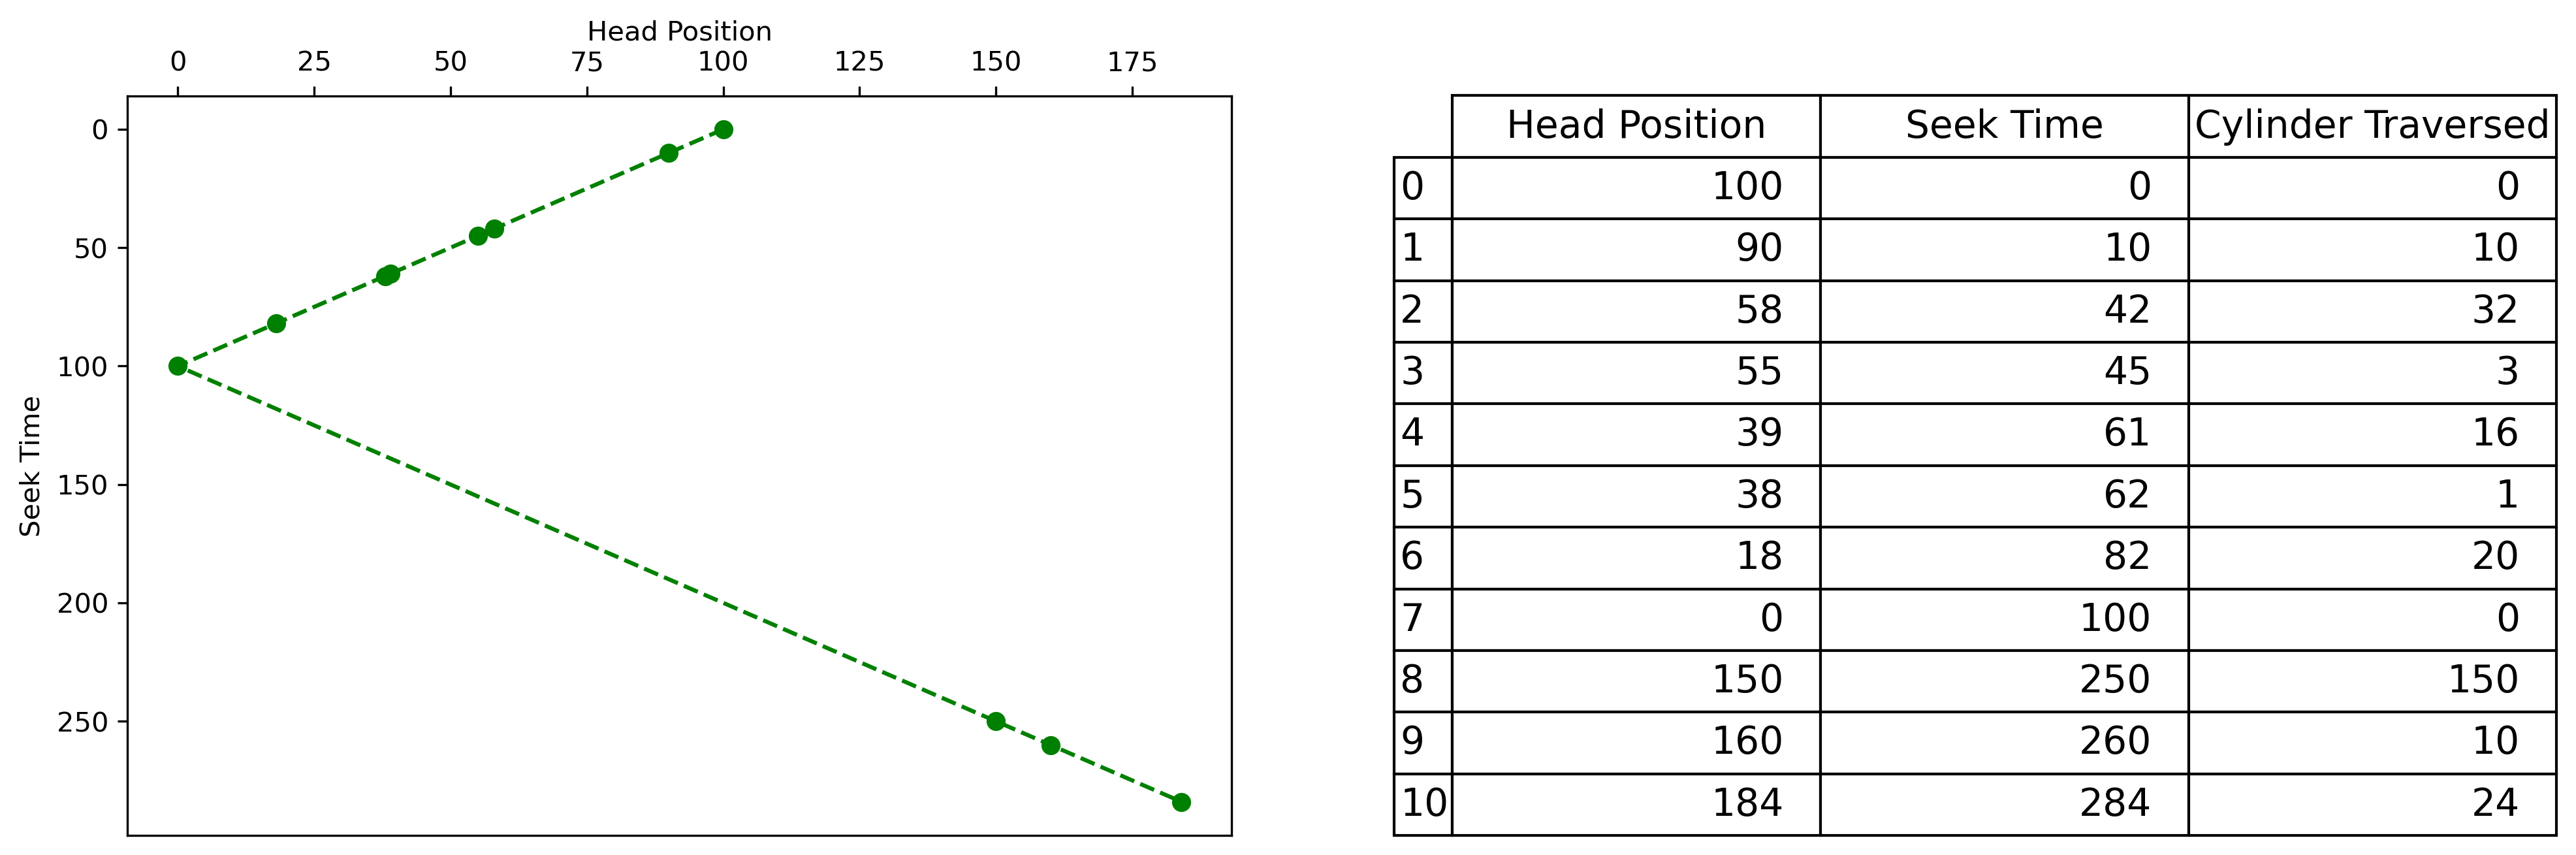

In [113]:
queue=[55, 58, 39, 18, 90, 160, 150, 38, 184]
head=100
SCAN(head, queue, direction="left")

<h1>LOOK (LEFT)</h1>

Starting head position: 25
Total seek time: 95
Average seek time: 9.5


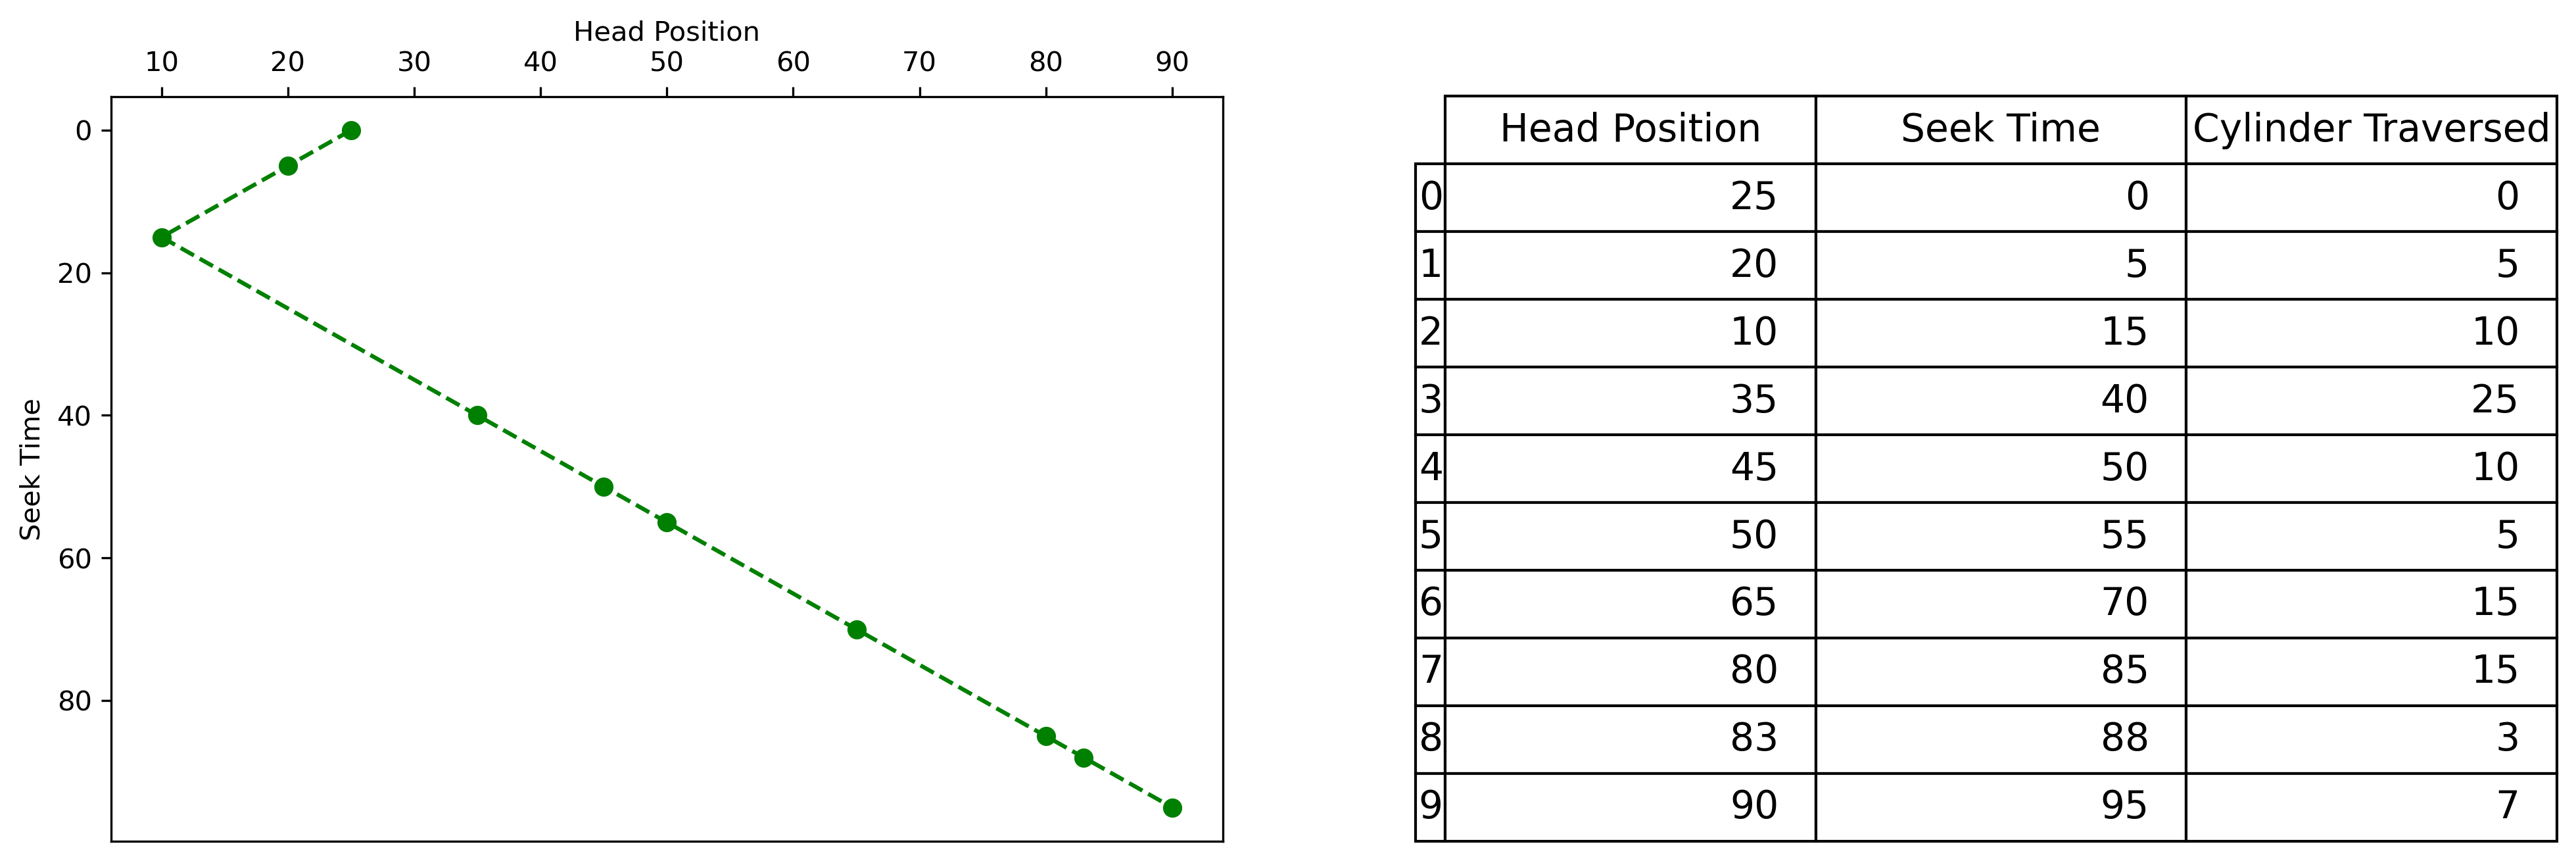

In [96]:
queue=[83, 35, 10, 90, 45, 80, 20, 50, 65]
head=25
LOOK(head, queue)

<h1>LOOK (RIGHT)</h1>

Starting head position: 25
Total seek time: 145
Average seek time: 14.5


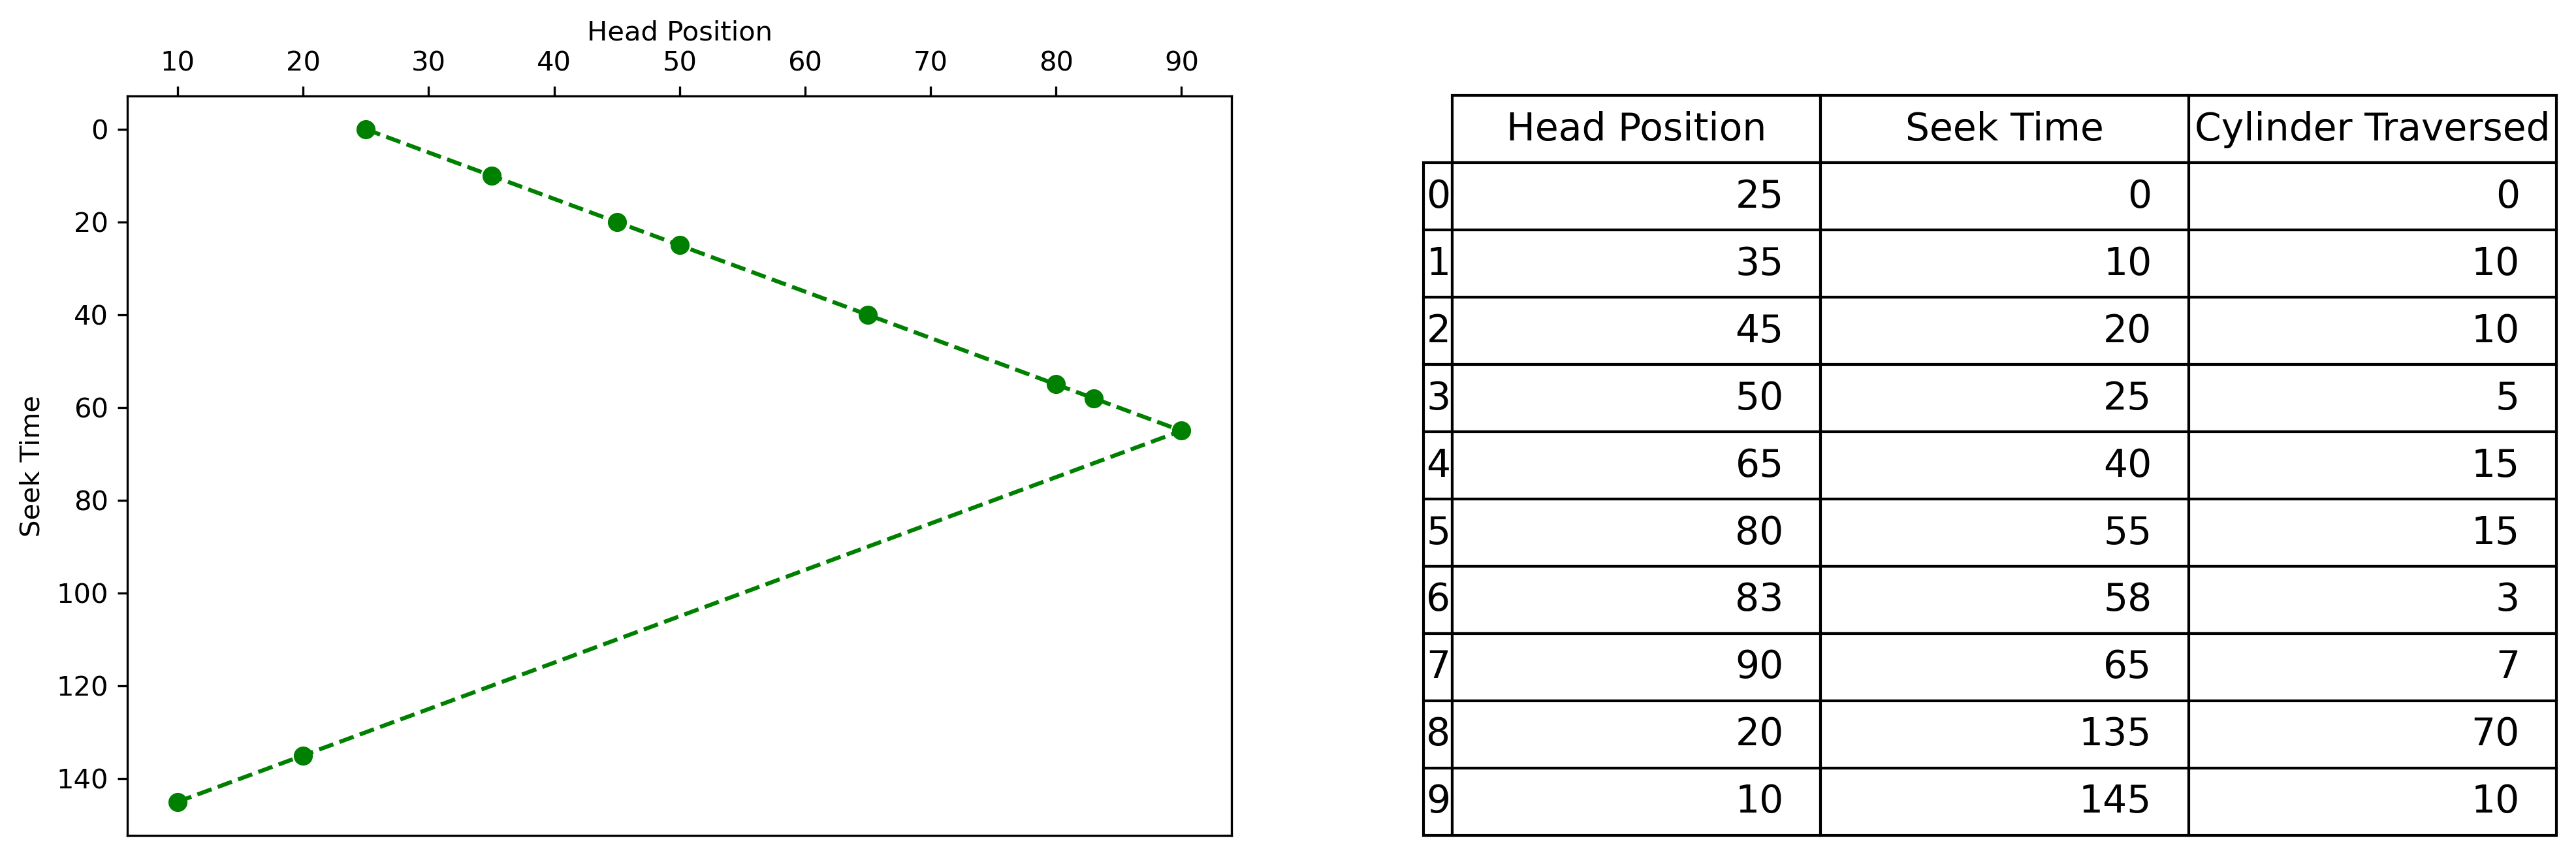

In [97]:
queue=[83, 35, 10, 90, 45, 80, 20, 50, 65]
head=25
LOOK(head, queue, direction="right")

<h1>SSTF</h1>

Starting head position: 25
Total seek time: 95
Average seek time: 9.5


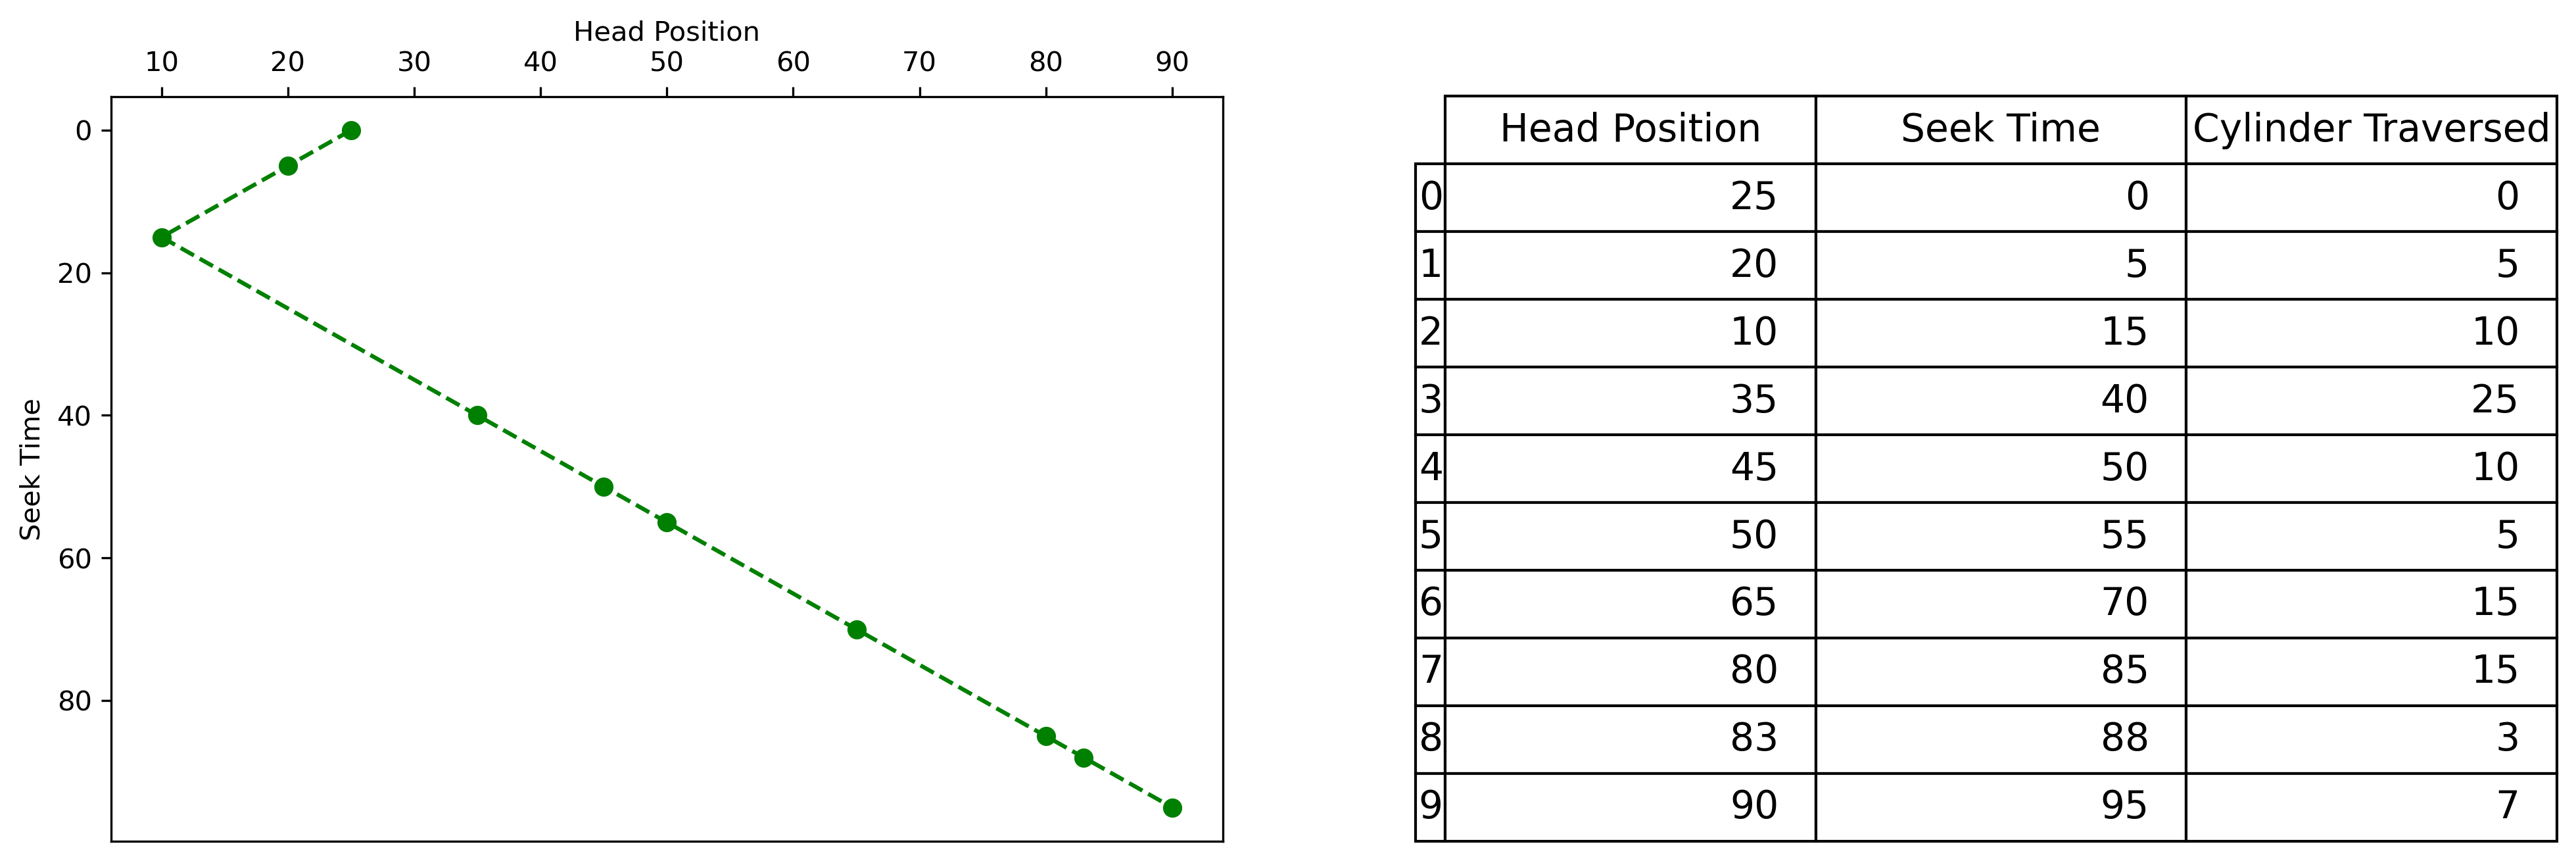

In [98]:
queue=[83, 35, 10, 90, 45, 80, 20, 50, 65]
head=25
SSTF(head, queue)